# Projet DU Data mining - Waveform dataset

In [1]:
# DU Data mining project 2021
# date : 12/12/2021
# Author : Sania TERKI
# python version: 3.8.8

###  Importing necessary libraries

In [2]:
!pip install -U scikit-learn
!python --version

Python 3.8.8


In [3]:
%pylab inline
import pandas as pd
import numpy as np
import seaborn as sns
import gc
import sys

#Delete furture warnings commentary
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Vizualisation librairies
import plotly.graph_objs as go
import plotly.offline as py
from matplotlib import style
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
from scipy.spatial.distance import cdist

#Gaussian smoothing
from scipy.ndimage import gaussian_filter1d
init_notebook_mode(connected = True)

#Normalization (min-max)
from sklearn import preprocessing

#PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler as scale
from sklearn.decomposition import PCA

#Clustering
from sklearn.cluster import k_means
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
from sklearn.cluster import DBSCAN 
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, \
adjusted_mutual_info_score, silhouette_score
from sklearn.neighbors import NearestNeighbors
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import centroid, fcluster
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as sch

Populating the interactive namespace from numpy and matplotlib


# *~ Caracteristics of the waveform dataset*

### 2. Loading the dataset

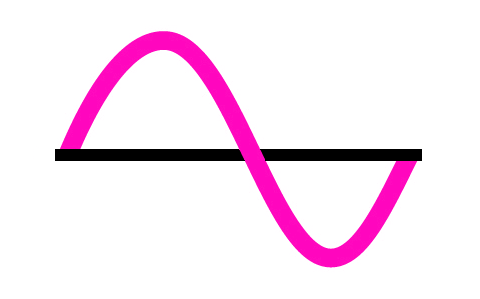

The waveform data was introduced first intoduced in *Breiman,L., Friedman,J.H., Olshen,R.A., & Stone,C.J. (1984). Classification and Regression Trees.*. The data set enfolds 300 instances with every instance assigned to one of three classes. An instance X<exp>i</exp> is defined by 40 continuous feature values. The instance base was generated such, that features [1,2,3....21] are necessary for class separation, whereas features [22,23,24...40] have random values and can be compared as noise.

This dataset is a generator which generates 3 classes of waves. Each class is generated from a combination of 2 of 3 “base” waves **h<sub>1</sub>(t), h<sub>2</sub>(t), h<sub>3</sub>(t)**. Each class consists of a random convex combination of two of these waveforms sampled at the integers with noise added. More specifically, the measurement vectors' are 21 dimensional: x= (xj,..., x2l). It contains 40 attributes, all of which include noise, the latter 19 attributes are all noise attributes with mean 0 and variance 1. Each class consists of a random convex combination of two of these waveforms sampled at the integers with noise added. The nominal feature (class) represent each classes (0, 1, 2). 
<sub> *Source: Breiman,L., Friedman,J.H., Olshen,R.A., & Stone,C.J. (1984). Classification and Regression Trees.  Wadsworth International      Group: Belmont, California. p43-49* </sub>

In [4]:
dataset = pd.read_csv("waveform-+noise.data", header= None) 

In [5]:
#Rename columns 
dataset.columns = 'x' + dataset.columns.astype(str)
dataset.rename(columns = {'x40':'Class'}, inplace = True) # rename the last column "Class"
print(f'{dataset.shape[0]} observations and {dataset.shape[1]-1} attributes')
dataset

5000 observations and 40 attributes


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x31,x32,x33,x34,x35,x36,x37,x38,x39,Class
0,-0.23,-1.21,1.20,1.23,-0.10,0.12,2.49,1.19,1.34,0.58,...,-0.86,-0.70,0.51,0.34,-0.13,-0.87,0.56,-0.53,0.29,2
1,0.38,0.38,-0.31,-0.09,1.52,1.35,1.49,3.81,2.33,1.34,...,1.28,1.40,0.00,-0.18,0.71,0.04,0.91,-0.79,0.22,0
2,-0.69,1.00,1.08,1.48,2.44,3.39,3.09,4.08,5.48,3.61,...,0.29,1.12,0.60,0.28,2.17,0.18,-0.09,-1.33,1.00,1
3,0.40,0.68,0.27,1.39,1.03,-0.32,-1.23,-0.50,0.11,0.87,...,0.43,-0.30,-0.07,-0.99,-0.75,1.11,1.35,-1.63,0.10,0
4,-0.81,1.59,-0.69,1.16,4.22,4.98,4.52,2.54,5.60,4.66,...,0.62,0.14,1.33,-1.87,1.48,-0.02,-0.58,0.93,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.44,0.56,1.84,1.94,3.43,4.88,4.04,2.11,1.83,0.78,...,-2.56,-0.68,0.97,-0.78,-1.14,0.45,0.18,1.44,1.11,0
4996,1.18,-0.48,1.81,1.51,1.41,3.61,3.75,3.80,3.44,3.71,...,0.37,-1.96,-1.19,-1.08,1.37,-1.02,0.71,-0.10,0.36,1
4997,0.64,0.81,-0.38,-0.88,1.55,0.10,0.42,-0.93,-0.70,1.54,...,1.61,-0.81,-1.35,-0.84,-0.64,1.19,-0.38,-0.70,-0.85,2
4998,0.18,1.65,1.91,2.07,4.28,3.61,4.46,4.62,4.80,0.25,...,-0.65,-0.73,0.89,-0.97,-1.30,-0.20,-0.63,-0.92,0.63,0


We're going to rename the class values:
* 0: for h1(t)
* 1: for h2(t)
* 2: for h3(t)

In [6]:
#rename values in class column
classes = {0:'h1(t)',
           1:'h2(t)',
           2:'h3(t)'}

dataset.Class = dataset.Class.map(classes)
dataset

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x31,x32,x33,x34,x35,x36,x37,x38,x39,Class
0,-0.23,-1.21,1.20,1.23,-0.10,0.12,2.49,1.19,1.34,0.58,...,-0.86,-0.70,0.51,0.34,-0.13,-0.87,0.56,-0.53,0.29,h3(t)
1,0.38,0.38,-0.31,-0.09,1.52,1.35,1.49,3.81,2.33,1.34,...,1.28,1.40,0.00,-0.18,0.71,0.04,0.91,-0.79,0.22,h1(t)
2,-0.69,1.00,1.08,1.48,2.44,3.39,3.09,4.08,5.48,3.61,...,0.29,1.12,0.60,0.28,2.17,0.18,-0.09,-1.33,1.00,h2(t)
3,0.40,0.68,0.27,1.39,1.03,-0.32,-1.23,-0.50,0.11,0.87,...,0.43,-0.30,-0.07,-0.99,-0.75,1.11,1.35,-1.63,0.10,h1(t)
4,-0.81,1.59,-0.69,1.16,4.22,4.98,4.52,2.54,5.60,4.66,...,0.62,0.14,1.33,-1.87,1.48,-0.02,-0.58,0.93,0.40,h2(t)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.44,0.56,1.84,1.94,3.43,4.88,4.04,2.11,1.83,0.78,...,-2.56,-0.68,0.97,-0.78,-1.14,0.45,0.18,1.44,1.11,h1(t)
4996,1.18,-0.48,1.81,1.51,1.41,3.61,3.75,3.80,3.44,3.71,...,0.37,-1.96,-1.19,-1.08,1.37,-1.02,0.71,-0.10,0.36,h2(t)
4997,0.64,0.81,-0.38,-0.88,1.55,0.10,0.42,-0.93,-0.70,1.54,...,1.61,-0.81,-1.35,-0.84,-0.64,1.19,-0.38,-0.70,-0.85,h3(t)
4998,0.18,1.65,1.91,2.07,4.28,3.61,4.46,4.62,4.80,0.25,...,-0.65,-0.73,0.89,-0.97,-1.30,-0.20,-0.63,-0.92,0.63,h1(t)


### Numerical columns

In [7]:
num_col = dataset.select_dtypes('number').columns
print("All numerical columns \n :", dataset.select_dtypes('number').columns)
print("All categorical columns \n :", dataset.select_dtypes('object').columns)

All numerical columns 
 : Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30',
       'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39'],
      dtype='object')
All categorical columns 
 : Index(['Class'], dtype='object')


### Description of the dataset

#### Minimum, maximum, mean, & standard deviation

In [8]:
dataset.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,-0.018560,0.326166,0.650104,1.003314,1.352290,2.009400,2.665556,2.681282,2.676300,2.996004,...,0.001790,0.030428,0.013870,0.033194,0.010934,0.018974,-0.025552,-0.010842,-0.004842,0.025928
std,1.001376,1.038729,1.178916,1.421484,1.668542,1.836581,2.032674,1.757478,1.668996,1.524579,...,0.999355,0.992020,1.015413,1.003251,1.003844,0.993279,0.992162,0.995722,1.010485,1.002822
min,-3.540000,-3.220000,-3.070000,-3.270000,-3.470000,-3.240000,-2.970000,-2.710000,-2.260000,-1.720000,...,-3.540000,-3.410000,-3.440000,-3.730000,-3.490000,-3.520000,-3.390000,-3.290000,-3.510000,-3.750000
25%,-0.682500,-0.390000,-0.170000,-0.020000,0.070000,0.640000,1.110000,1.340000,1.490000,1.900000,...,-0.660000,-0.640000,-0.660000,-0.650000,-0.650000,-0.660000,-0.720000,-0.660000,-0.670000,-0.652500
50%,-0.030000,0.310000,0.640000,0.920000,1.200000,1.840000,2.530000,2.730000,2.825000,3.010000,...,0.000000,0.040000,0.030000,0.060000,-0.000000,0.010000,-0.030000,-0.030000,0.000000,0.030000
75%,0.660000,1.020000,1.430000,2.000000,2.530000,3.390000,4.220000,3.992500,3.940000,4.100000,...,0.640000,0.700000,0.710000,0.730000,0.682500,0.682500,0.650000,0.670000,0.680000,0.690000
max,3.350000,4.250000,4.720000,5.680000,6.660000,7.810000,8.530000,7.560000,7.330000,7.860000,...,3.780000,3.190000,3.380000,4.040000,3.550000,3.330000,3.320000,3.720000,3.330000,3.500000


As we can see, the range of our values for our attributes is between -3.7 and 8.5 with 5000 unique values for each attributes.

#### Missing values

In [9]:
percent_missing = dataset.isnull().sum() * 100 / len(dataset)
display(percent_missing)
print("There is no missing values in this dataset")

x0       0.0
x1       0.0
x2       0.0
x3       0.0
x4       0.0
x5       0.0
x6       0.0
x7       0.0
x8       0.0
x9       0.0
x10      0.0
x11      0.0
x12      0.0
x13      0.0
x14      0.0
x15      0.0
x16      0.0
x17      0.0
x18      0.0
x19      0.0
x20      0.0
x21      0.0
x22      0.0
x23      0.0
x24      0.0
x25      0.0
x26      0.0
x27      0.0
x28      0.0
x29      0.0
x30      0.0
x31      0.0
x32      0.0
x33      0.0
x34      0.0
x35      0.0
x36      0.0
x37      0.0
x38      0.0
x39      0.0
Class    0.0
dtype: float64

There is no missing values in this dataset


### Data vizualisation

#### 1- Distribution of each classes

We're defining a function in order to plot the distribution, of the 3 classes, to see which one is more important.

In [10]:
def viz_distrib():
    classes = dataset['Class'].value_counts() # counting values for each class
    classes_label = classes.index
    classes_size = classes.values
    
    colors = ['gold', 'blueviolet', 'deeppink'] # defining colors
    trace = go.Pie(labels = classes_label, 
                   values = classes_size, 
                   marker = dict(colors = colors), 
                   name = 'Wave classes', hole = 0.7) # defining parameters to pie plot
    df = [trace]
    layout = go.Layout(title = 'Distribution of each classes')
    fig = go.Figure(data = df, layout = layout)
    py.iplot(fig)

Now, we're going to see the proportion of each classes.

In [11]:
viz_distrib()

As we can see the distribution for each class is around 33%.

#### 2- Ploting some waveforms

Now, we 're going to define a function in order to plot some waveforms of each class and take a look at. For that, we need first to define a palette of colors we will use.

In [12]:
#Defining palette of colors in a dictionnary for each class
colors = {"h1(t)":'gold', 
          "h2(t)":'deeppink', 
          "h3(t)": 'blueviolet'
         }
# We add a color column to the dataset
dataset['Color'] = dataset['Class'].map(colors)
dataset.head(5)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x32,x33,x34,x35,x36,x37,x38,x39,Class,Color
0,-0.23,-1.21,1.20,1.23,-0.10,0.12,2.49,1.19,1.34,0.58,...,-0.70,0.51,0.34,-0.13,-0.87,0.56,-0.53,0.29,h3(t),blueviolet
1,0.38,0.38,-0.31,-0.09,1.52,1.35,1.49,3.81,2.33,1.34,...,1.40,0.00,-0.18,0.71,0.04,0.91,-0.79,0.22,h1(t),gold
2,-0.69,1.00,1.08,1.48,2.44,3.39,3.09,4.08,5.48,3.61,...,1.12,0.60,0.28,2.17,0.18,-0.09,-1.33,1.00,h2(t),deeppink
3,0.40,0.68,0.27,1.39,1.03,-0.32,-1.23,-0.50,0.11,0.87,...,-0.30,-0.07,-0.99,-0.75,1.11,1.35,-1.63,0.10,h1(t),gold
4,-0.81,1.59,-0.69,1.16,4.22,4.98,4.52,2.54,5.60,4.66,...,0.14,1.33,-1.87,1.48,-0.02,-0.58,0.93,0.40,h2(t),deeppink


Then, we're defining a function which returns an axis with the normalized waveform, together with its **color and class name**. It requires trace of the values and waveforms data.

In [13]:
def plot_waveform(index, ax = None):
    """ 
    Arguments
    ---------
    index (int)
        the index of the waveform to be selected in the
        Pandas object.
    ax (matplotlib axis object)
        If None, use current axis object
    """
    if ax is None:
        ax = plt.gca()
    else:
        ax = ax
    
    df = dataset.drop(['Class', 'Color'], axis = 1, inplace=False)
    trace = df.values # raw values
    smoothed = gaussian_filter1d(trace, sigma=5)

    ax.plot(smoothed[index], color = dataset.iloc[index].Color) #"smoother" version of these waves using the Gaussian Smoothing.
    ax.text(x = 25, y= 1, s=dataset.iloc[index].Class, fontsize=15, color=dataset.iloc[index].Color)
    
    return ax

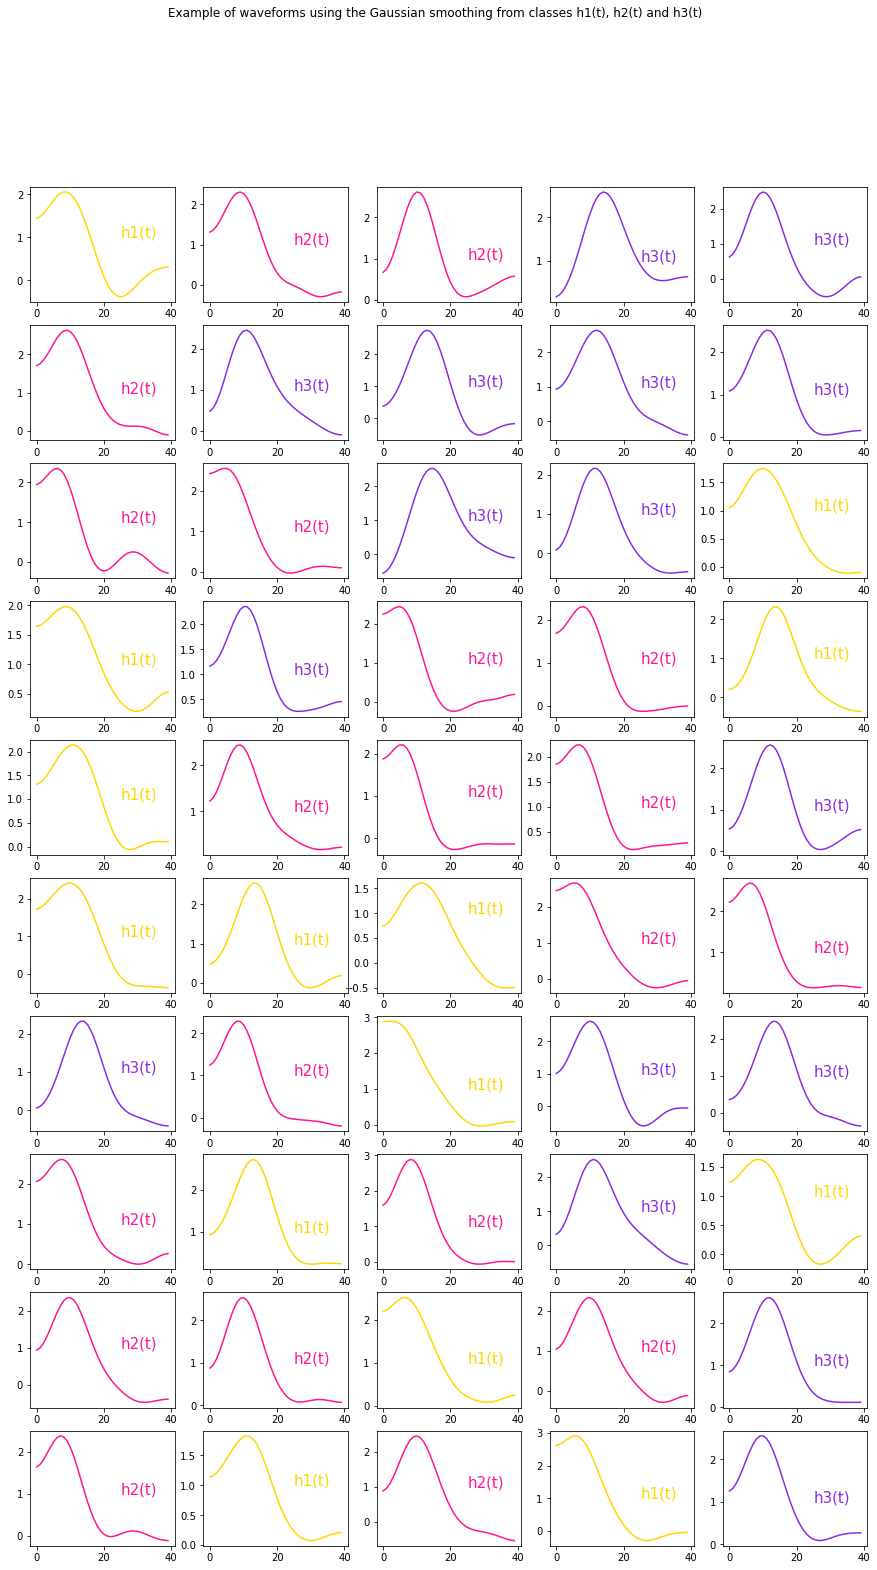

In [14]:
np.random.seed(200) #for reproductibility
myidx = np.random.choice(range(len(dataset)), size = 300, replace = False)

# plotting the 10 columns and 5 rows
fig, ax = plt.subplots(10, 5, figsize=(15,25))
fig.suptitle('Example of waveforms using the Gaussian smoothing from classes h1(t), h2(t) and h3(t)')

counter = 0
for i in range(10):
    for j in range(5):
        ax[i,j] = plot_waveform(index = myidx[counter], ax = ax[i,j])
        counter +=1
        
plt.savefig('waves_ex_viz.png', dpi = 300)

On the examples, the x-axis represents the features and the y-axis the feature values for the corresponding classes. Thus we see waveforms that are quite similar between the different classes. The portion corresponding between 20 and 40 on the x-axis corresponds to the value of the noise (attribute 22 to 39) and therefore does not provide any information.

#### 3- Checking distribution

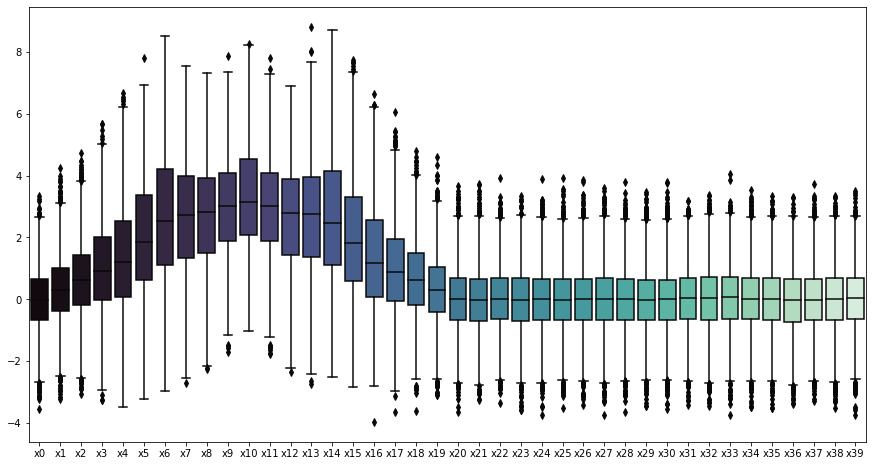

In [15]:
#boxplot
plt.figure(3, figsize = (15, 8))
fig.suptitle('Boxplot of the attributes from the waveform dataset')
ax = sns.boxplot(data=dataset, orient="v", palette="mako")

The boxplots confirm the characteristics of the dataset, namely that for the attributes 20 to 39, we obtain a mean of 0 and a variance of 1. The average varies according to the attributes (where it increases at first and then decreases from the attribute X9 due to the shape of the wave and the positioning of the points).

# ~ *Feature extraction*

We're going to see the distribution of the first 21 attributes that are not qualified as noise and where mean and variance are not equal respectively to 0 and 1.

In [16]:
dataset_raw = dataset.iloc[:,0:22]

### Checking correlation between attributes

Now, we want to see if there is any correlation between attributes.

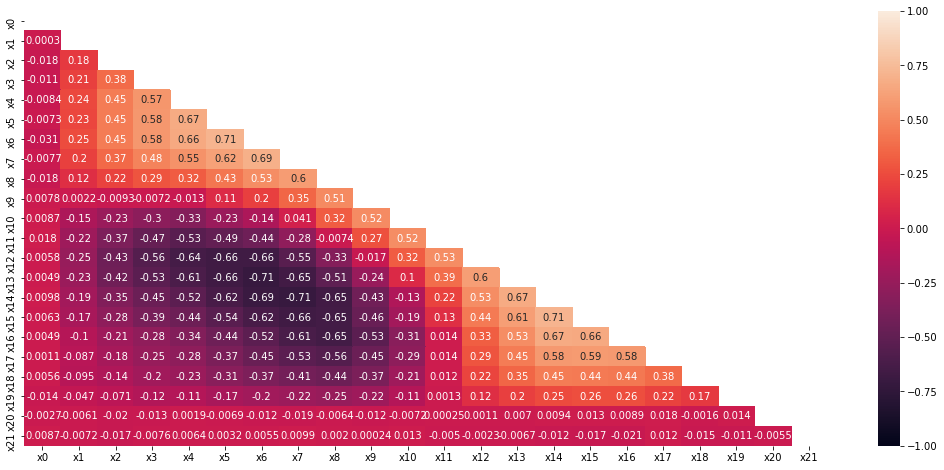

<Figure size 432x288 with 0 Axes>

In [17]:
plt.figure(3, figsize = (18, 8))

#keeping necessary columns
corr_dataset = dataset_raw.copy()

#drawing correlation matrix
corrmatrix = corr_dataset.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrmatrix, dtype=bool))

#plot
sns.heatmap(corrmatrix, mask=mask, annot=True, vmin=-1, vmax=1);
plt.show()
plt.savefig('heatmap_corr.png', dpi = 300)

Since the attributes correspond to their position in space, it seems normal that the attributes that follow each other are more correlated to each other because of their proximity (X14 and X15, X9 and X8) contrary to those that are far away in their positionings (X8 and X16).

### Normalization

In order to avoid duplicate data and to minimize outliers effect, we are going to normalize the data. It's mandatory in some case where attributes have values on different scales and it can facilitate the application of data mining algorithms. Normalization of our data should fit the normal law (bell curve).

Let's plot the actual distribution of our dataset.

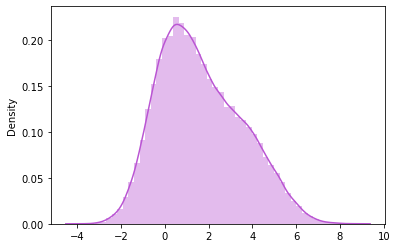

In [18]:
#create distplots
trace = dataset[num_col[0:22]]
sns.distplot(trace, color="mediumorchid");

Now, we will use the **min-max method** from sklearn library in order to obtain a bell-curve shape. 

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21
0,-0.039187,-0.461847,0.096277,0.005587,-0.334650,-0.391855,-0.050435,-0.240506,-0.249218,-0.519833,...,0.512987,0.480969,0.321460,0.132325,0.171375,0.578512,0.053381,0.394567,0.272230,-0.041607
1,0.137881,-0.036145,-0.291399,-0.289385,-0.014808,-0.169231,-0.224348,0.269718,-0.042753,-0.361169,...,0.173160,0.340830,0.029386,0.177694,0.167608,0.278926,0.368921,-0.428202,-0.105335,-0.578192
2,-0.172714,0.129853,0.065469,0.061453,0.166831,0.200000,0.053913,0.322298,0.614181,0.112735,...,0.015152,-0.705882,-0.440784,-0.629490,-0.403013,-0.119835,-0.058126,-0.221216,-0.392613,0.546628
3,0.143687,0.044177,-0.142490,0.041341,-0.111550,-0.471493,-0.697391,-0.569620,-0.505735,-0.459290,...,0.266234,0.318339,0.276937,0.614367,0.259887,-0.053719,0.319098,-0.073739,-0.132695,0.279770
4,-0.207547,0.287818,-0.388960,-0.010056,0.518263,0.487783,0.302609,0.022395,0.639208,0.331942,...,0.049784,-0.110727,-0.228851,-0.400756,0.141243,-0.190083,-0.727165,0.443726,-0.072503,-0.256815


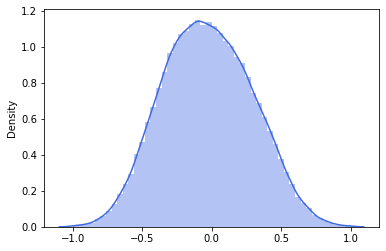

In [19]:
scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1)) #changing the range of values from -1 to 1 
                                                             #due to negative value in the original dataset.
name_col = trace.columns
norm_trace = scaler.fit_transform(trace) #applying minmax on our dataset
scaled_df = pd.DataFrame(norm_trace, columns=name_col) # converting the array into a df

#plot
sns.distplot(norm_trace, color="royalblue");

#5 first in df
scaled_df.head()

We can see that our distribution is perfectly following a **normal law**. The values are now from **-1 to 1** which will make the application of data mining algorithims much easier.

# ~ *Clustering*

#### Determining the correct number of clusters with Kmeans

To determine the optimal number of clusters, we need to compute the cluster after which inertia start decreasing linearly. 

Inertia: is the sum of squared errors. Thus, the inertia is the sum of squared euclidian distances for each point to its closed centroid.

This strategy is called the **"elbow method"** which allows to identify the number of clusters to use or to identify the number of categories that we can use to segment the observations of the waveforms.

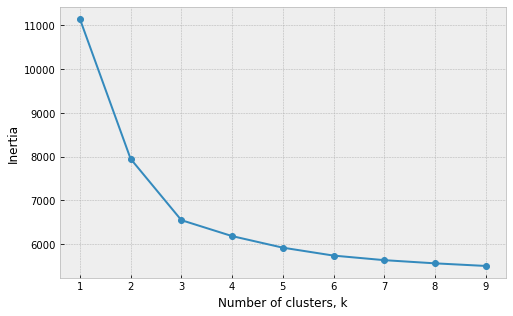

In [20]:
ks = range(1, 10)
inertias = []
scaled_raw = scaled_df.iloc[:,0:22]

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(scaled_raw)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

The correct number of clusters corresponds to where the inertia forms an "elbow" on the graph and where the other values of the inertia are decreasing. Therefore the estimated number of clusters is 3

## **Hierarchical Clustering**

#### *1- Using the complete & ward method*

*Full linkage clustering*: Calculates the dissimilarity of each pair between the elements of cluster 1 and the elements of cluster 2, and considers the maximum of these dissimilarities as the distance between the two clusters. It tends to produce more compact clusters. 

*Ward Minimum Dispersion Method*: Minimizes the total variance in the cluster. At each step, the cluster pairs with the least spacing between the clusters are merged.

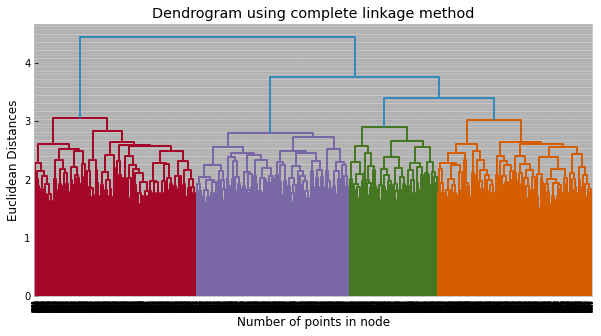

In [21]:
Xraw = scaled_df.iloc[:,0:22].values

#With complete method
plt.figure(1, figsize = (10, 5))
dendrogram = sch.dendrogram(sch.linkage(Xraw, method='complete'))
plt.title("Dendrogram using complete linkage method")
plt.xlabel("Number of points in node")
plt.ylabel("Euclidean Distances")
plt.show()

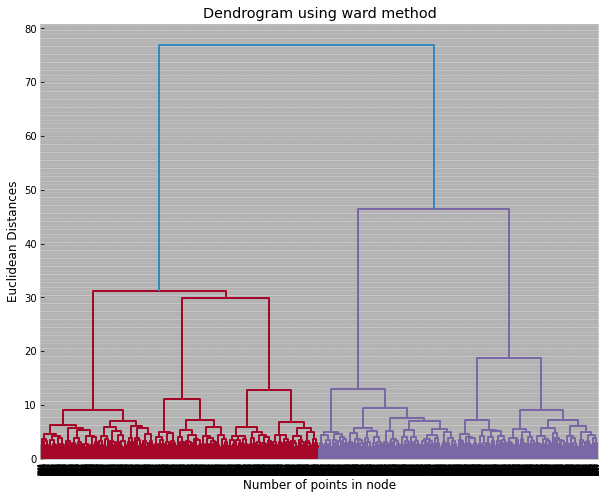

In [22]:
#With ward method

plt.figure(1, figsize = (10, 8))
dendrogram2 = sch.dendrogram(sch.linkage(Xraw, method='ward'))
plt.title("Dendrogram using ward method")
plt.xlabel("Number of points in node")
plt.ylabel("Euclidean Distances")
plt.show()

As we can see, the dendogramm produced with the ward method is composed of 2 clusters where as the one produced by the complete method is composed with 4 clusters.

#### 2- ***Agglomerative clustering***

Based on dendograms, we choose the complete linkage because it describe best the clustering we had predict.

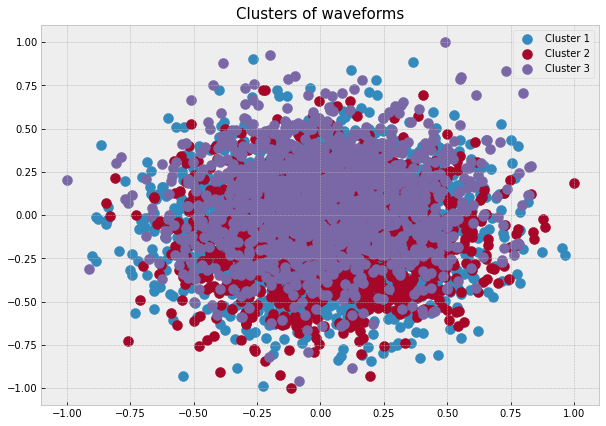

In [50]:
clusterer = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
labels = clusterer.fit_predict(Xraw)
cluster_labels = clusterer.labels_

plt.figure(figsize = (10, 7))

plt.scatter(Xraw[labels == 0,0], Xraw[labels == 0,1], label = 'Cluster 1', s = 100)
plt.scatter(Xraw[labels == 1,0], Xraw[labels == 1,1], label = 'Cluster 2', s = 100)
plt.scatter(Xraw[labels == 2,0], Xraw[labels == 2,1], label = 'Cluster 3', s = 100)

plt.legend(loc = 'best')
plt.title('Clusters of waveforms', fontsize = 15)
plt.show()

We find 3 overlapping clusters, which seems logical since we have 3 classes in our dataset. 

Now we're performing some *metrics calculation*.

According to the sklearn documentation, a clustering result satisfies **homogeneity** if all of its clusters contain only data points which are members of a single class and a clustering result satisfies **completeness** if all the data points that are members of a given class are elements of the same cluster.

Also we're going to calculate the **Silhouette score** which, for a collection of data points, is used as a measure of cluster density and separation. The range for it is [-1, 1]. A silhouette score of 1 means that the clusters are very dense and well separated. A score of 0 means that the clusters overlap. A score of less than 0 means that the data belonging to the clusters may be false/incorrect.

Furthermore, the **adjusted Rand index** can measure random labeling independently of the number of clusters and samples and measure the similarity of the clusterings. The **Adjusted Mutual Information** can measure if classes members are completely split across different clusters (0) or not (1).
The **v-measure** is an harmonic mean of the first two.

In [24]:
true_labels = dataset["Class"]
data= [{'homo': homogeneity_score(true_labels, cluster_labels), 
        'compl': completeness_score(true_labels, cluster_labels),
        'v-meas': v_measure_score(true_labels, cluster_labels),
        'ARI': adjusted_rand_score(true_labels, cluster_labels),
        'AMI': adjusted_mutual_info_score(true_labels, cluster_labels),
        'silhouette': silhouette_score(Xraw, cluster_labels, metric='euclidean')}]
    
# Create the pandas DataFrame
df_caracteristics = pd.DataFrame(data)
df_caracteristics = df_caracteristics.round(4).T
display(df_caracteristics.T)

,homo,compl,v-meas,ARI,AMI,silhouette
0,0.2401,0.2451,0.2425,0.164,0.2423,0.1449


As we can see, we have a weak silhouette score. It is confirmed with the plot where clusters are not really separated.

In [25]:
y = pdist(scaled_df)
print(y)

[1.60225674 2.70274614 1.57505403 ... 2.94407927 1.92239013 2.07884856]


## PCA Clustering

### 1- Dimensionnality reduction & PCA

#### 1.1- Standardizing

We will find the optimal number of components which capture the greatest amount of variance in the data. Since we have 40 attributes, we're going to create an instance of pca ( **10 components**) and then adjusted it later.

We need first to scale the data to obtain a mean of 0 and a variance of 1

In [26]:
stand_df = StandardScaler().fit_transform(scaled_raw)

#defining pca & standardizing
df_pca = pd.DataFrame(stand_df)
df_pca.columns = scaled_df.columns

pca =  PCA(n_components = 10).fit(df_pca)
principalComponents = pca.fit_transform(stand_df)

gc.collect()
df_pca.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21
0,-0.211171,-1.479039,0.466489,0.159487,-0.870482,-1.028862,-0.086376,-0.848620,-0.800741,-1.584861,...,1.206806,1.784754,1.131254,0.653619,0.546515,2.137850,0.138997,1.834527,1.009133,0.112425
1,0.398052,0.051832,-0.814477,-0.769213,0.100523,-0.359073,-0.578388,0.642301,-0.207511,-1.086313,...,0.260715,1.325605,0.312518,0.786767,0.534528,1.112445,1.247836,-1.154968,-0.362423,-1.754827
2,-0.670585,0.648775,0.364690,0.335378,0.651958,0.751798,0.208832,0.795946,1.680040,0.402772,...,-0.179187,-2.103841,-1.005448,-1.582143,-1.281588,-0.252405,-0.252849,-0.402894,-1.405998,2.159411
3,0.418027,0.340676,-0.322450,0.272057,-0.193176,-1.268462,-1.916661,-1.810321,-1.537784,-1.394625,...,0.519836,1.251915,1.006447,2.068308,0.828223,-0.026109,1.072756,0.132959,-0.461811,1.230778
4,-0.790432,1.216834,-1.136839,0.110238,1.718864,1.617624,0.912409,-0.080397,1.751947,1.091555,...,-0.082770,-0.153875,-0.411365,-0.910860,0.450615,-0.492845,-2.603922,2.013144,-0.243157,-0.636473


,0,1,2,3,4,5,6,7,8,9
0,3.350295,-1.913598,-0.650027,0.901511,0.536523,1.504894,-0.694216,0.183945,-1.086894,-0.760338
1,1.895948,-0.905548,-0.478742,-0.681356,-1.596954,-0.438201,1.419334,0.025112,0.830098,-0.414530
2,-3.395845,-0.378318,1.543426,-0.869225,1.945253,-0.451188,-0.072640,-0.110653,0.359043,-0.413295
3,3.978732,-1.473332,1.313755,-0.049451,0.436504,-0.565769,0.130515,-0.161811,0.163425,0.982232
4,-2.516148,0.451257,-1.163885,-0.410136,0.222303,-0.474895,-2.507056,2.511785,-0.316651,-0.106835
...,...,...,...,...,...,...,...,...,...,...
4995,-1.285386,-3.627839,0.602888,-1.275804,-0.376558,0.833690,-1.126308,-0.124542,0.103957,0.296549
4996,-2.440941,0.328827,1.949643,0.250892,0.294334,0.953688,0.185992,-0.224415,-0.691236,-0.056767
4997,4.335990,-2.199448,1.307196,-0.652754,-0.006336,-0.516460,-0.643344,0.551463,0.089657,0.975633
4998,-3.265136,-2.355626,-1.109796,1.331952,-0.756820,-0.511527,-0.614843,-0.039635,-0.197008,-0.130710


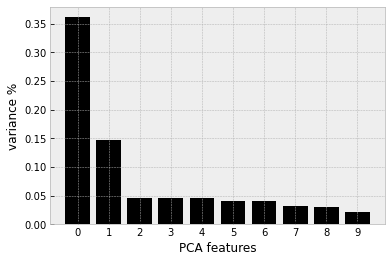

In [27]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)
PCA_components

As we can see, there is a big drop off of our variance after the second component. Here, the optimal number of components which capture the greatest amount of variance in the data is **two**. Furthermore, we want to check the percentage of the variance covered by the first main component.

In [28]:
round(float(pca.explained_variance_ratio_[0] * 100))

36

In [29]:
pca =  PCA(n_components = 2).fit(df_pca)
df_pca = pd.DataFrame(pca.transform(df_pca))
pcs = ['pc'+str(i+1) for i in range(2)]
df_pca.columns = pcs
df_pca

,pc1,pc2
0,3.350295,-1.913615
1,1.895948,-0.905542
2,-3.395845,-0.378293
3,3.978733,-1.473338
4,-2.516148,0.451273
...,...,...
4995,-1.285385,-3.627885
4996,-2.440941,0.328825
4997,4.335989,-2.199434
4998,-3.265136,-2.355643


In [30]:
dataset['pc1'] = df_pca.pc1.values
dataset['pc2'] = df_pca.pc2.values
var = pca.explained_variance_ratio_*100 # variance in percentage
print('The explained variation by the two first principal components: {:2.2f}%, {:2.2f}%'.format(var[0], var[1]))

The explained variation by the two first principal components: 36.11%, 14.66%


Now we have to add the class target of the dataset.

In [31]:
df_pca.columns = pcs
df_pca['Class'] = dataset.Class.values
df_pca.head()

,pc1,pc2,Class
0,3.350295,-1.913615,h3(t)
1,1.895948,-0.905542,h1(t)
2,-3.395845,-0.378293,h2(t)
3,3.978733,-1.473338,h1(t)
4,-2.516148,0.451273,h2(t)


Now, we're going to plot it.

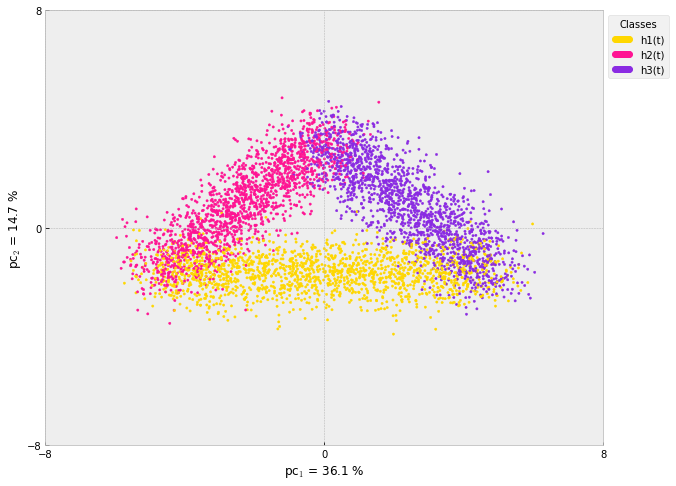

In [32]:
# visualize
fig, ax = plt.subplots(1,1, figsize=(10,8))

ax.scatter(x = dataset.pc1, y = dataset.pc2, s=5, c=dataset.Color)
ax.set_xlabel(f'pc$_1$ = {var[0]:2.1f} %');
ax.set_ylabel(f'pc$_2$ = {var[1]:2.1f} %');
ax.set_xlim(-8,8), ax.set_ylim(-8,8)
ax.set_yticks([-8,0,8]), ax.set_xticks([-8,0,8])

markers = [plt.Line2D([],[], color= i, marker = 'o', linestyle = '') for i in colors.values()]

ax.legend(markers, colors.keys(), numpoints = 10,  title = 'Classes', bbox_to_anchor=(1, 1), loc='upper left');
plt.savefig('pca-wave_classes.png', dpi = 300)

In this PCA, we can observe a triangular shape where each vertex presents points of 2 different classes. This dataset being a waveform generator, for each class, we find similarities on the distribution of the points for the principal components restoring the most information (x1 and x2) at the level of the vertices, and a side specific to each class.

### 3- Unbiassed Cluster calculation based on PCA

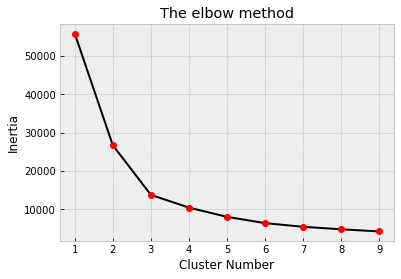

<Figure size 432x288 with 0 Axes>

In [33]:
inertia = list() # sum of squared error

for k in range(1,10): #check the inertia intra-class
    kmean = KMeans(n_clusters=k, init='k-means++', random_state = 0)
    kmean = kmean.fit(df_pca[pcs])
    inertia.append(kmean.inertia_) #contain inertia inter-class values

#plot the inertia values
plt.plot(range(1,10), inertia, '-', color='black',);
plt.plot(range(1,10), inertia, 'o', ms=6, color='red');
plt.title('The elbow method')
plt.xlabel("Cluster Number")
plt.ylabel("Inertia")
plt.show();
plt.savefig('nb_clusters_plot.png', dpi = 300)

As we said before the optimal cluster number is 3

We're defining a function that perform K-means but this time it wiil be on the PCA df, furthermore we're going to compute some metrics in order to evaluate the performance of our clustering

In [34]:
def k_means(n_clust, dataframe, labels):
    k_means = KMeans(n_clusters = n_clust, random_state=42, n_init=15)
    k_means.fit(dataframe)
    c_labels = k_means.labels_
    df = pd.DataFrame({'clust_label': c_labels, 'orig_label': true_labels.tolist()})
    ct = pd.crosstab(df['clust_label'], df['orig_label'])
    y_clust = k_means.predict(dataframe)
    display(ct)
    
    # displaying characterictisc of kmeans in a df
    data= [{'inertia': k_means.inertia_, 
        'homo': homogeneity_score(true_labels, y_clust), 
        'compl': completeness_score(true_labels, y_clust),
        'v-meas': v_measure_score(true_labels, y_clust),
        'ARI': adjusted_rand_score(true_labels, y_clust),
        'AMI': adjusted_mutual_info_score(true_labels, y_clust),
        'silhouette': silhouette_score(dataframe, y_clust, metric='euclidean')}]
    
    # Create the pandas DataFrame
    df_caracteristics = pd.DataFrame(data)
    df_caracteristics = df_caracteristics.round(4).T
    display(df_caracteristics.T)

In [35]:
k_means(n_clust = 3, dataframe = stand_df, labels = true_labels) #on our scaled dataframe

orig_label,h1(t),h2(t),h3(t)
clust_label,,,
0,871,912,0
1,5,741,708
2,816,0,947


,inertia,homo,compl,v-meas,ARI,AMI,silhouette
0,67908.9639,0.3646,0.366,0.3653,0.2517,0.3651,0.2049


We obtain a weak score for silhouette which means that the cluster are dense and they overlap.

In [36]:
def pca_transform(n_comp):
    pca = PCA(n_components=n_comp, random_state=42)
    global Data_reduced
    Data_reduced = pca.fit_transform(stand_df)
    print('Shape of the new Data df: ' + str(Data_reduced.shape))

In [37]:
pca_transform(n_comp=2)
k_means(n_clust=3, dataframe=Data_reduced, labels=true_labels)

Shape of the new Data df: (5000, 2)


orig_label,h1(t),h2(t),h3(t)
clust_label,,,
0,870,911,0
1,817,0,947
2,5,742,708


,inertia,homo,compl,v-meas,ARI,AMI,silhouette
0,13775.069,0.3646,0.366,0.3653,0.2516,0.3651,0.5018


As we can see the silhouette score is a bit better so the clustering is a bit better to. To confirm that we're going to plot the clusters in order to see if they overlap or not.

In [38]:
# define colors according to the cluster label
myKmeans = KMeans(n_clusters=3, init='k-means++', random_state = 0)
myKmeans.fit(df_pca[pcs])
kcolors = pd.DataFrame(myKmeans.labels_, columns=['Ktype'])

kcolors['color'] = kcolors['Ktype'].map({ 0:'m', 1:'c', 2:"r"}) #2 clusters
kcolors.T

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
Ktype,1,1,0,1,0,2,0,2,0,1,...,1,2,2,1,2,0,0,1,0,1
color,c,c,m,c,m,r,m,r,m,c,...,c,r,r,c,r,m,m,c,m,c


Defining a function which plots k-centroids from a kmeans model.

In [39]:
def plot_radii(mykmeans, X, ax = None):
    """    
    Arguments
    ---------
    kmeans (Kmeans object)
        (sklearn.sklearn.cluster.Kmeans model)
    
    X (2D-Numpy array)
        The observations ith the observations)
    
    ax (an axis object)
    """
    # plot the input data
    ax = ax or plt.gca()
    
    labels = mykmeans.labels_ # read labels

    centers = mykmeans.cluster_centers_ # centroids
    radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centers)]
    
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='gray', lw=1, alpha=0.05, zorder=1))

Let's check if we retrieve the same information as the PCA provided

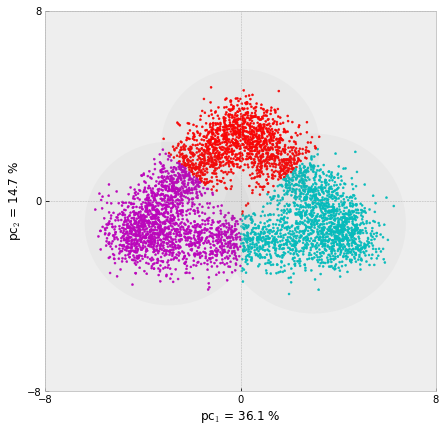

In [40]:
fig, ax = plt.subplots(1,1, figsize=(7,7))

ax.scatter(x = df_pca.pc1, y = df_pca.pc2, s=4, c= kcolors.color)
var1, var2 = var[0], var[1]
ax.set_xlabel(f'pc$_1$ = {var1:2.1f} %');
ax.set_ylabel(f'pc$_2$ = {var2:2.1f} %');
ax.set_xlim(-8,8), ax.set_ylim(-8,8)
ax.set_yticks([-8,0,8]), ax.set_xticks([-8,0,8]);

plot_radii(mykmeans = myKmeans, X = df_pca[pcs], ax = ax)
#plt.savefig('clusters_classes.png', dpi = 300)

As we can see, the 3 clusters obtained are from a different shape when we compared it with PCA results. 

### DBscan clustering

The difference with kmeans is that DBSCAN calculates a number of clusters. It works by identifying if the minimum number of points are sufficiently close to form one cluster. Because Epsilon ("epsilon") is the fixed value of maximum distance of two points, it is highly sensitive to scale.

In [41]:
X = stand_df
display(X)

array([[-0.21117062, -1.47903857,  0.46648857, ...,  1.83452656,
         1.00913336,  0.11242451],
       [ 0.39805223,  0.051832  , -0.81447682, ..., -1.15496754,
        -0.36242278, -1.75482694],
       [-0.67058458,  0.64877525,  0.36469   , ..., -0.40289356,
        -1.4059981 ,  2.15941141],
       ...,
       [ 0.65772099,  0.46584103, -0.87385932, ...,  0.903835  ,
        -1.11777253,  0.68158672],
       [ 0.19830703,  1.27460284,  1.0687968 , ...,  0.44318968,
         1.59552331, -0.88610568],
       [ 2.06592465, -2.23003168,  0.85671644, ...,  1.30807477,
        -1.46563098,  1.13092531]])

In [42]:
#performing NN
neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

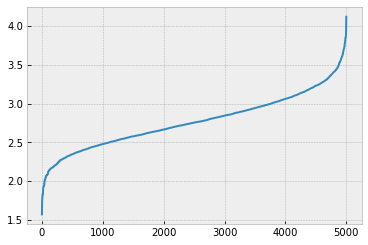

In [43]:
#Evaluating the correct value for epsilon
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances);

Based on this graph, the correct value for epsilon is 3

In [44]:
m = DBSCAN(eps=3, min_samples=6)
m.fit(X)

DBSCAN(eps=3, min_samples=6)

In [45]:
clusters = m.labels_
clusters

array([ 0, -1, -1, ...,  0, -1, -1], dtype=int64)

In [46]:
#Computing metrics
core_samples_mask = np.zeros_like(m.labels_, dtype=bool)
core_samples_mask[m.core_sample_indices_] = True
labels = m.labels_ 

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.5f" % metrics.homogeneity_score(true_labels, labels))
print("Completeness: %0.5f" % metrics.completeness_score(true_labels, labels))
print("V-measure: %0.5f" % metrics.v_measure_score(true_labels, labels))
print("Adjusted Rand Index: %0.5f"
      % metrics.adjusted_rand_score(true_labels, labels))
print("Adjusted Mutual Information: %0.5f"
      % metrics.adjusted_mutual_info_score(true_labels, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.5f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Estimated number of noise points: 1556
Homogeneity: 0.00178
Completeness: 0.00311
V-measure: 0.00227
Adjusted Rand Index: 0.00038
Adjusted Mutual Information: 0.00145
Silhouette Coefficient: -0.12322


There we have a pretty bad clustering due to the number of noise points that reach 1556 and because of the negative value for the silhouette coefficient.

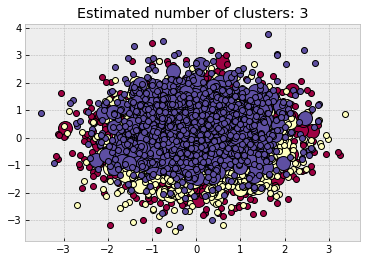

In [51]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # white used for noise.
        col = [0, 0, 0, 0]
    class_member_mask = labels == k
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",                          
        markersize=6,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

As we can see on the DBscan clustering graph, we have 3 clusters that overlap.

## ~*Conclusion*

Based on the metrics for clustering, the best method is the clustering based on PCA. Because we keep the 2 principal compoennts that give the more information, it may explain why the resulting clustering is better. Furthermore, DBscan clustering revealed that this dataset may contain some noise points (after feature selection). The agglomerative clustering can be considered as best to DBscan based on the metrics calculations (Silhouette score, v-measure, completeness, homogeneity..) but least performant compared to K-means clustering. The number of clusters found was usually 3 which is logical because the dataset is separated into 3 classes. 